In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

creating custom dataset

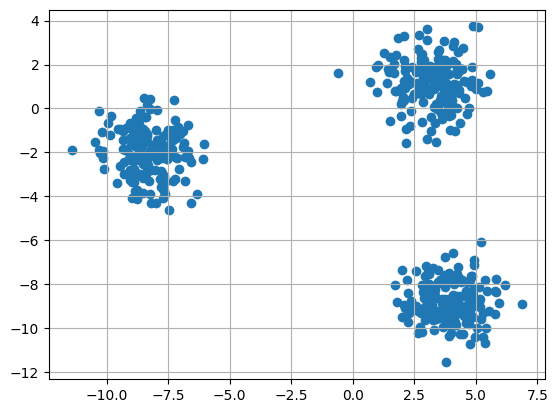

In [9]:
X,y=make_blobs(n_samples=500,n_features=2,centers=3,random_state=500)
fig=plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2 * (2 * np.random.random((X.shape[1],)) - 1)  # random center in [-2, 2]
    cluster = {
        'center': center,
        'points': []
    }
    clusters[idx] = cluster
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

plotting random intialized  center with data points

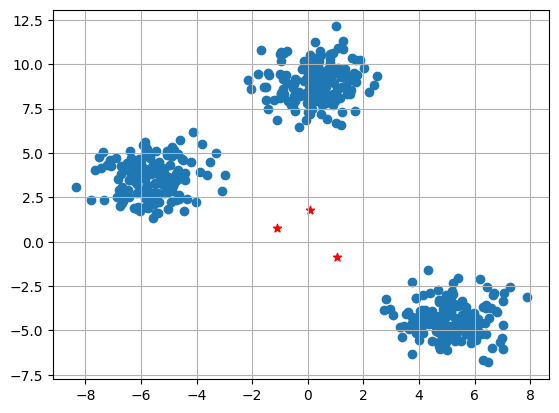

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker='*',c='red')
plt.show()